In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize, pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
classification_report, accuracy_score, precision_score, plot_confusion_matrix

### Loading the data

In [2]:
ls

Final_notebook.ipynb    README.md               Working_notebook.ipynb


In [3]:
df = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/listings (1).csv')

In [4]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210901220703,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20210901220703,2021-09-02,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,https://www.airbnb.com/rooms/5121,20210901220703,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,1,0,1,0,0.54
3,5136,https://www.airbnb.com/rooms/5136,20210901220703,2021-09-02,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20210901220703,2021-09-02,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.40,4.86,4.36,NaN,f,1,0,1,0,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,52002317,https://www.airbnb.com/rooms/52002317,20210901220703,2021-09-02,HUGE ROOM IN IDEAL LES SPOT,Extremely Huge Room in the IDEAL Lower East Si...,NaN,https://a0.muscache.com/pictures/40bc2a16-7609...,283057520,https://www.airbnb.com/users/show/283057520,...,NaN,NaN,NaN,NaN,t,4,0,4,0,NaN
36919,52004427,https://www.airbnb.com/rooms/52004427,20210901220703,2021-09-02,Furnished Cozy Bedroom in East Village Location,"Full room in a 4 bedroom, 2 bathroom shared ho...",NaN,https://a0.muscache.com/pictures/361bd18b-3f23...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,307,56,251,0,NaN
36920,52005507,https://www.airbnb.com/rooms/52005507,20210901220703,2021-09-03,Bedroom Near Train w/ Washer Dryer,Bedroom Near Train w/ Washer Dryer,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,9372363,https://www.airbnb.com/users/show/9372363,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
36921,52005691,https://www.airbnb.com/rooms/52005691,20210901220703,2021-09-02,Furnished Cozy Bedroom in East Village Location,"Full room in a 3 bedroom, 1 bathroom shared ho...",NaN,https://a0.muscache.com/pictures/958369fa-05c1...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,307,56,251,0,NaN


In [5]:
#df_reviews = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/reviews (1).csv')

In [6]:
#df_reviews

In [7]:
df.shape

(36923, 74)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [9]:
#pd.options.display.max_rows = 4000

In [10]:
df.duplicated().sum()

0

### Dropping empty columns and columns not needed

host_response_time                              
host_response_rate                              
host_acceptance_rate                           

#### Removing columns not needed

In [11]:
df = df.drop(['host_url','listing_url', 'picture_url','host_thumbnail_url', 'host_picture_url','neighbourhood'
             ,'property_type','bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights'
             ,'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'
             ,'calendar_updated','calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
             'first_review','last_review', 'review_scores_value','license','reviews_per_month', 'neighborhood_overview'
             ,'host_response_rate', 'host_acceptance_rate','host_about', 'host_location', 'scrape_id','last_scraped'], axis =1)

In [12]:
df.shape

(36923, 44)

In [13]:
df.isna().sum()

id                                                  0
name                                               13
description                                      1213
host_id                                             0
host_name                                         111
host_since                                        111
host_response_time                              15743
host_is_superhost                                 111
host_neighbourhood                               7197
host_listings_count                               111
host_total_listings_count                         111
host_verifications                                  0
host_has_profile_pic                              111
host_identity_verified                            111
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
room_type                   

In [14]:
median = df.filter(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location']).median()

In [15]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location']                          
df[cols]=df[cols].fillna(median)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(14630, 44)

In [18]:
df.isna().sum()

id                                              0
name                                            0
description                                     0
host_id                                         0
host_name                                       0
host_since                                      0
host_response_time                              0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0


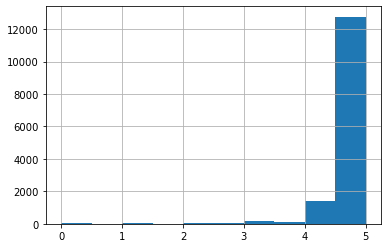

In [19]:
df['review_scores_rating'].hist();

In [20]:
#new_rating = df[(df['review_scores_rating'] >= 4.0)]

In [21]:
# fig, ax = plt.subplots(figsize= (10,10))
# ax.hist(x = new_rating['review_scores_rating'], bins = 100)
# plt.show()

In [22]:
#new_rating['review_scores_rating'].value_counts()

In [23]:
#df['review_scores_rating'].describe()

In [24]:
df = df.reset_index()

In [25]:
df.head()

,index,id,name,description,host_id,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,2008-12-07,within a day,f,Clinton Hill,...,4.59,4.50,4.79,4.81,4.72,f,1,1,0,0
1,3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2009-02-03,within a day,f,Greenwood Heights,...,5.00,5.00,5.00,5.00,4.50,f,1,1,0,0
2,4,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,8967,Shunichi,2009-03-03,within an hour,f,Hell's Kitchen,...,4.20,3.73,4.66,4.40,4.86,f,1,0,1,0
3,6,5803,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",9744,Laurie,2009-03-10,within a few hours,t,Park Slope,...,4.71,4.62,4.80,4.82,4.86,f,3,1,2,0
4,9,6990,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,16800,Cyn,2009-05-12,within an hour,f,East Harlem,...,4.81,4.96,4.96,4.95,4.84,t,1,0,1,0


In [26]:
df.shape

(14630, 45)

#### Imbalanced Target

In [27]:
df['has_availability'].value_counts()

t    14590
f       40
Name: has_availability, dtype: int64

In [38]:
df['has_availability'] = df['has_availability'].map({'t': 0,
                                     'f': 1,})

## Modeling

### Train/Test Split

In [39]:
X= df.drop(['has_availability','host_id'],axis=1)
y= df['has_availability']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, stratify=y)

#### Creating a Cleaning pipline

In [42]:
#Categorical variables to use
categorical_vars = ["host_response_time","host_has_profile_pic","host_identity_verified","host_is_superhost"
            ,"neighbourhood_group_cleansed","room_type","instant_bookable"]

# Numerical Variables to use
# num_vars = ['price','minimum_nights','bedrooms', 'beds', "reviews_per_month","host_listings_count",
#            "calculated_host_listings_count_shared_rooms", "host_response_rate", "host_acceptance_rate",
#            "review_scores_cleanliness","review_scores_value","review_scores_rating", "number_of_reviews"]

In [43]:
train_dummies = X_train[categorical_vars]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
enc = ohe.fit(train_dummies)
train_dummies_trans = enc.transform(train_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categorical_vars)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names,index = X_train.index)

In [44]:
# test_dummies = X_test[categorical_vars]
# # Create OneHotEncoder object to create dummies
# ohe = OneHotEncoder(handle_unknown='ignore')

# # Transform the dataset into dummies matrix
# enc = ohe.fit(test_dummies)
# test_dummies_trans = enc.transform(test_dummies)

# # Dummies values in matrix form
# test_data = test_dummies_trans.todense()

# # New dummy column names
# names = ohe.get_feature_names(categorical_vars)

# # Make them into Dataframe
# test_dummies_trans_df = pd.DataFrame(test_data, columns=names,index = X_test.index)

In [45]:
numerical = X_train.select_dtypes(exclude='object') 
numerical = pd.DataFrame(numerical, index = X_train.index)
df_train = train_dummies_trans_df.merge(numerical, left_index = True , right_index=True)

In [46]:
df_train.shape

(10972, 47)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10972 entries, 13278 to 1217
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time_a few days or more         10972 non-null  float64
 1   host_response_time_within a day               10972 non-null  float64
 2   host_response_time_within a few hours         10972 non-null  float64
 3   host_response_time_within an hour             10972 non-null  float64
 4   host_has_profile_pic_f                        10972 non-null  float64
 5   host_has_profile_pic_t                        10972 non-null  float64
 6   host_identity_verified_f                      10972 non-null  float64
 7   host_identity_verified_t                      10972 non-null  float64
 8   host_is_superhost_f                           10972 non-null  float64
 9   host_is_superhost_t                           10972 non-nu

In [ ]:
# def label(df):
#     '''
#     Encode values of the target to numerical data.
#     '''
#     df['has_availability'] = df['has_availability'].map({'t': 0,
#                                                          'f': 1})
#     return df

# def creating_dummies(df):
#     '''
#     Creating dummy varibles for our categorical varibles
#     '''
#     categorical_vars = ["host_response_time","host_has_profile_pic","host_identity_verified","host_is_superhost"
#                         ,"neighbourhood_group_cleansed","room_type","instant_bookable"]
    
#     ohe = OneHotEncoder()
#     ohe.fit_transform(df[categorical_vars])
#     ohe.get_feature_names(categorical_vars)
    
#     return df

# cleaning_pipeline = Pipeline(steps=[
#     ('label', FunctionTransformer(label)),
#     ('ohe', OneHotEncoder(creating_dummies))
# ])

In [ ]:
# df_train_new = cleaning_pipeline.fit_transform(df_train)
# df_test_new = cleaning_pipeline.transform(df_test)

In [ ]:
df_train_new.head()

#### Creating a function that prints out validation score

In [ ]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

### First Simple Model (baseline)

In [49]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# fit final model
model = LinearRegression()
model.fit(df_train, y_train)
# new instances where we do not know the answer
#Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=42)
# make a prediction
ynew = model.predict(df_train)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175], Predicted=-0.0041825159863349
X=[-0.61175641  1.62434536], Predicted=-0.002536486481762301
X=[-2.3015387   0.86540763], Predicted=0.0011152597438630618
